#Composite Histogram Testing

In [134]:
import sys
from imp import reload
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('/home/wtb2/Documents/EBTEL_analysis/src/')
import ebtel_plot_em as ebpe
reload(ebpe)

<module 'ebtel_plot_em' from '/home/wtb2/Documents/EBTEL_analysis/src/ebtel_plot_em.py'>

Here, we'll test the building of histograms of slope values for a whole set of heating functions or all of our sets of $T_N$ values. We will only discriminate between species and loop length $L$.

First, set some alpha values as a list of two-parameter lists of $\alpha$ and $b$ values.

In [135]:
alpha_list = [['uniform',''],['1.5',''],['1.5','-b1.0'],['1.5','-b2.0'],
              ['2.0',''],['2.0','-b1.0'],['2.0','-b2.0'],
             ['2.5',''],['2.5','-b1.0'],['2.5','-b2.0']]

Instantiate the histogram builder class.

In [136]:
histo_builder = ebpe.EMHistoBuilder('electron',40.0,100.0,alpha_list,group='by_alpha')

Now, load and format the data.

In [137]:
histo_builder.loader()

Now, build the dictionary of histogram options.

In [138]:
colors = ['k'] + 3*['b','r','g']  
styles = ['dotted'] + 3*['solid'] + 3*['dashdot'] + 3*['dashed'] 
labels = [r'$\alpha$=uniform',r'$\alpha=-1.5$',r'$\alpha=-1.5$, $b=1$',r'$\alpha=-1.5$, $b=2$',
         r'$\alpha=-2.0$',r'$\alpha=-2.0$, $b=1$',r'$\alpha=-2.0$, $b=2$',
         r'$\alpha=-2.5$',r'$\alpha=-2.5$, $b=1$',r'$\alpha=-2.5$, $b=2$',]
histo_opts = {}
for i in range(len(alpha_list)):
    histo_opts[''.join(alpha_list[i])] = {'color':colors[i],'label':labels[i],'linestyle':styles[i],'linewidth':2}

Finally, build the histograms using our options specified above.

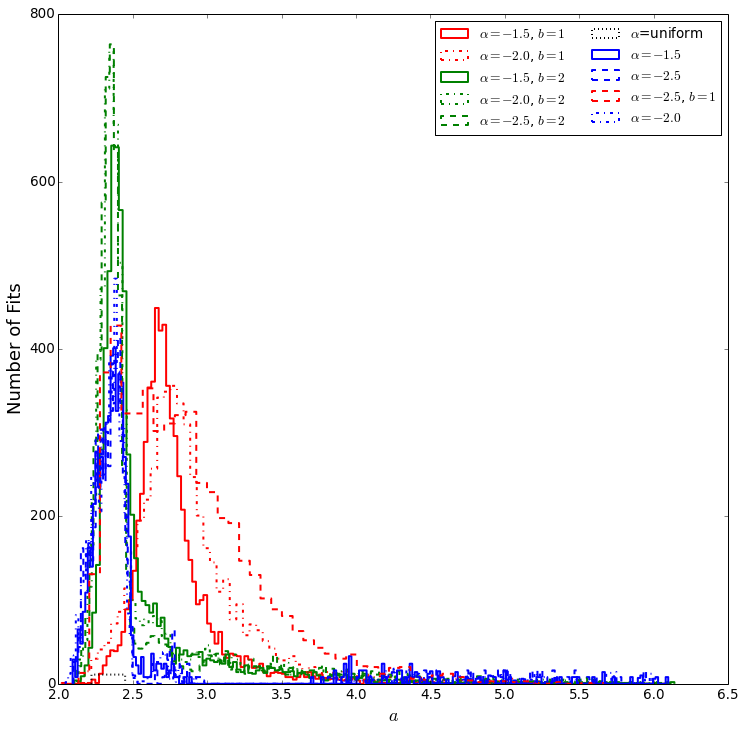

In [139]:
histo_builder.histo_maker('cool',histo_opts=histo_opts)

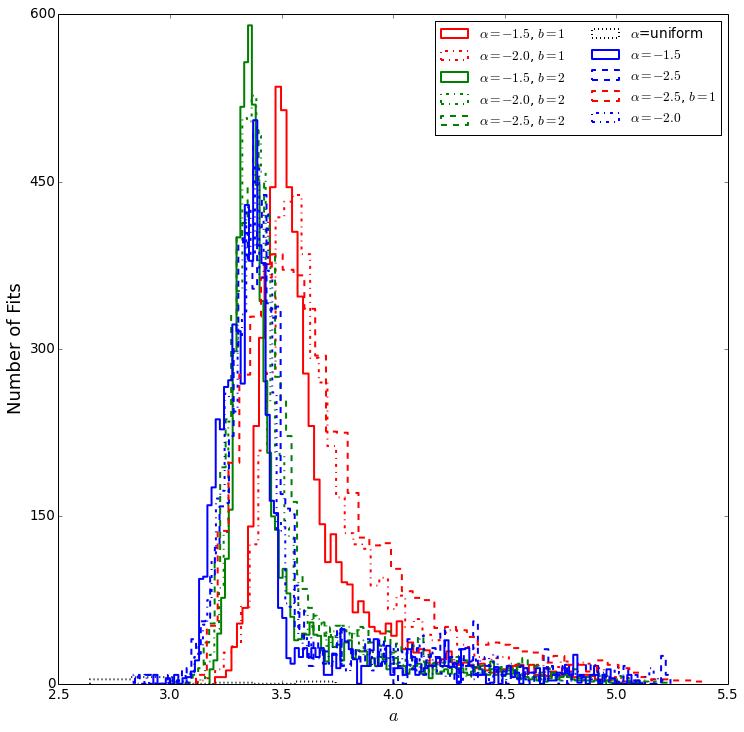

In [140]:
histo_builder.histo_maker('hot',histo_opts=histo_opts)

What if we bin by $T_N$ instead?

In [141]:
histo_builder_2 = ebpe.EMHistoBuilder('electron',40.0,100.0,alpha_list,group='by_t_wait')

In [142]:
histo_builder_2.loader()

TypeError: 'int' object is not iterable